# Extragerea trasaturilor, clasificare k-NN 

In [1]:

# Import pachete necesare aplicatiei

import numpy as np
import cv2
import math
from scipy.spatial import ConvexHull
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
# Functia pentru extragerea trasaturilor geometrice dintr-o imagine
def GeomFeatExtr(fileName, afis):
    
    # citire imagine direct pe nivele de gri
    img = cv2.imread(fileName, 0)
    
    # binarizare imagine
    ret,Y = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

    # detectarea muchiilor pentru calcul perimetru
    # se pastreaza negativul muchiilor (muchie reprezentata prin negru)
    E = cv2.bitwise_not( cv2.Canny(Y,50,500) )

    # Calcul trasaturi geometrice
    A = np.sum(np.sum(Y==0)) #aria
    P = np.sum(np.sum(E==0)) #perimetrul
    circ = (P*P)/(4*math.pi*A) #circularitate

    [pozYA, pozXA] = np.where(Y==0) #toate pozitiile din obiect
    yC = sum(pozYA)/A #calcul centru de masa
    xC = sum(pozXA)/A

    [pozYP, pozXP] = np.where(E==0) #toate pozitiile de pe contur
    #calculul distantei de la contur la centru de masa
    dist = np.sqrt(np.power(pozYP-yC,2) + np.power(pozXP-xC,2))
    rmin = np.amin(dist) #distanta minima
    rmax = np.amax(dist) #distanta maxima
    exc = rmax/rmin #excentricitate
   
    # Soliditate obiect
    points = np.column_stack((pozXP,pozYP))
    hull = ConvexHull(points)
    Ach = ConvexHull(points).volume
    sol = A/Ach # soliditate
    
    if afis==1: # doar daca optiune afisare activa
        tt = [[1, 1], [2, 2]] #pentru afisare halou        
        Em=cv2.erode(E, np.ones((3,3),np.uint8), iterations = 1 )        
        fig = plt.figure(figsize=(10,8))
        fig.add_subplot(1,3,1), plt.imshow(Y, cmap=plt.cm.bone);plt.title('binarizata')
        fig.add_subplot(1,3,2), plt.imshow(Em, cmap='gray');plt.title('muchii')
        fig.add_subplot(1,3,3), plt.imshow(tt, 'gray')
        plt.plot(points[:,0], points[:,1], '.'), plt.title('halou convex')
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'r')
        plt.show()
        
    # Stabilire vector de trasaturi    
    geomFeat = [circ, exc, sol]
    return geomFeat


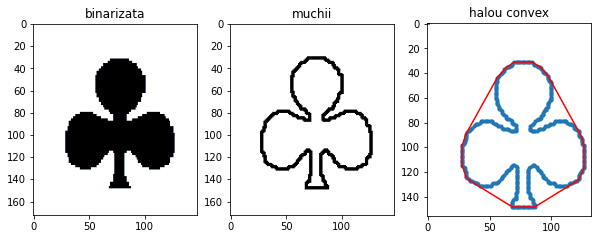

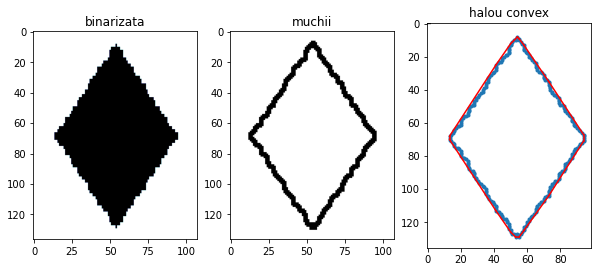

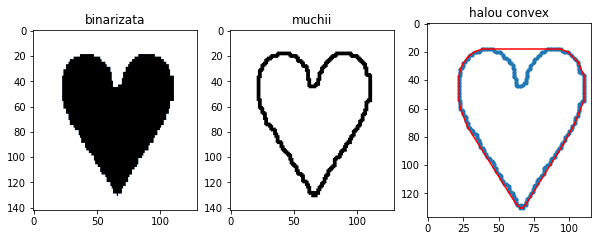

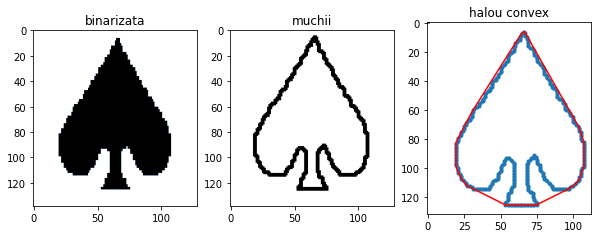

In [3]:
# vectorul de trasaturi 3D = [circ, exc, sol]
    
# Citire imagini - 24 imagini (4 forme, 6 imagini/forma)
pathTrn = '/Users/galoscar07/Documents/master2k20-2k22/2nd Semester/SIAI/Laborator/_TestImages/ImgTstRecOb_Cards/'
shapeName = ['Clubs','Diamonds','Hearts','Spades'] 

clr = ['b','r','m','c', 'k'] #cod culoare pentru o forma
frm = ['*','+','.','o','<','>','^'] #cod reprezentare imagini de o forma

# Citim toate imaginile din directorul pathTrn utilizare in aplicatie
# sunt 4 forme diferite, fiecare forma are 6 imagini diferite
x = []; y=[]; clrV = []; frmV=[];
for i in range(0,4): #consideram fiecare forma
    for j in range(0,6): # nr de imagini pentru fiecare forma
        af = 0
        fileName = pathTrn + shapeName[i] + str(j) + '.jpg'
        if (j==0): # afisam prima imagine de la fiecare forma
            af = 1 
        x.append(GeomFeatExtr(fileName,af))
        y.append(i)
        clrV.append(clr[i])
        frmV.append(frm[j])
        


In [10]:
x


[[2.8057680485520073, 7.531269420284568, 0.752336163195505],
 [2.880246835941636, 7.206940324196684, 0.7522682208736405],
 [2.880246835941636, 7.300258619333867, 0.7513653003660807],
 [2.8440556120612346, 7.300258619333867, 0.7535813169615988],
 [3.784485179324863, 7.632444146412078, 0.7674973592582451],
 [3.011897113822748, 3.5515680868393376, 0.795161071088759],
 [1.1240842028509057, 1.865717004478257, 0.9428626027135486],
 [1.4158469702781533, 1.5543019445723991, 0.9320323014804845],
 [1.1671362493405657, 1.859197790421286, 0.936994016191482],
 [1.9186820656595163, 1.7523302259129927, 0.9308361827789865],
 [1.8345968172710176, 1.7911008624677651, 0.9463303953224541],
 [1.4651084128295886, 1.8265492538813646, 0.9376905487804879],
 [1.3607528625612306, 3.544577890516974, 0.909720176730486],
 [1.5410098314404346, 3.2876810358642694, 0.8969408969408967],
 [1.812088630515297, 3.5951543151585037, 0.9086299012949379],
 [1.3641120896448897, 3.8030513791712353, 0.9217939214232767],
 [1.73932

In [11]:
y

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3]

In [12]:
# x vectorul de trasaturi 
# x are 24=4*6 linii (imagini totale), 3 coloane (numar trasaturi/imagine)
x = np.asarray(x) 
# y - vector cu labelurile fiecarei imagini
y = np.asarray(y) 

print("x.shape: ",x.shape)
print("y.shape: ",y.shape)

x.shape:  (24, 3)
y.shape:  (24,)


In [13]:
x

array([[2.80576805, 7.53126942, 0.75233616],
       [2.88024684, 7.20694032, 0.75226822],
       [2.88024684, 7.30025862, 0.7513653 ],
       [2.84405561, 7.30025862, 0.75358132],
       [3.78448518, 7.63244415, 0.76749736],
       [3.01189711, 3.55156809, 0.79516107],
       [1.1240842 , 1.865717  , 0.9428626 ],
       [1.41584697, 1.55430194, 0.9320323 ],
       [1.16713625, 1.85919779, 0.93699402],
       [1.91868207, 1.75233023, 0.93083618],
       [1.83459682, 1.79110086, 0.9463304 ],
       [1.46510841, 1.82654925, 0.93769055],
       [1.36075286, 3.54457789, 0.90972018],
       [1.54100983, 3.28768104, 0.8969409 ],
       [1.81208863, 3.59515432, 0.9086299 ],
       [1.36411209, 3.80305138, 0.92179392],
       [1.73932159, 3.69151024, 0.90161867],
       [1.62809363, 2.22143635, 0.95963056],
       [2.0545356 , 3.64058335, 0.85941921],
       [2.51305484, 3.76512718, 0.85464581],
       [3.0244284 , 4.74681198, 0.82702757],
       [4.14069197, 8.17705357, 0.71877379],
       [2.

In [14]:
# In[4]: Scalare date in acelasi interval
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [15]:
x

array([[ 0.75556613,  1.60102433, -1.46275958],
       [ 0.84783538,  1.45279064, -1.46363731],
       [ 0.84783538,  1.4954415 , -1.47530189],
       [ 0.8029993 ,  1.4954415 , -1.44667378],
       [ 1.96806558,  1.64726596, -1.26689622],
       [ 1.01093244, -0.21788689, -0.90951627],
       [-1.32781492, -0.98840035,  0.99859954],
       [-0.96635993, -1.13073172,  0.85868583],
       [-1.27447921, -0.99137994,  0.92278487],
       [-0.34341459, -1.04022346,  0.8432335 ],
       [-0.44758495, -1.02250345,  1.04339901],
       [-0.9053316 , -1.00630186,  0.93178319],
       [-1.03461415, -0.22108174,  0.57044158],
       [-0.81129991, -0.33849572,  0.40534954],
       [-0.47546958, -0.19796593,  0.5563566 ],
       [-1.03045252, -0.10294716,  0.72641899],
       [-0.56561821, -0.15392672,  0.46578038],
       [-0.70341475, -0.82581983,  1.21522021],
       [-0.17511026, -0.17720271, -0.07938289],
       [ 0.39293367, -0.12028031, -0.1410491 ],
       [ 1.02645702,  0.32839594, -0.497


--- Reprezentarea grafică a obiectelor în diverse spaţii a trăsăturilor ---

 Reprezentare sptiu 1D.
      Daca ar fi necesar sa reprezentam forma doar printr-o trasatura, care ati alege-o?


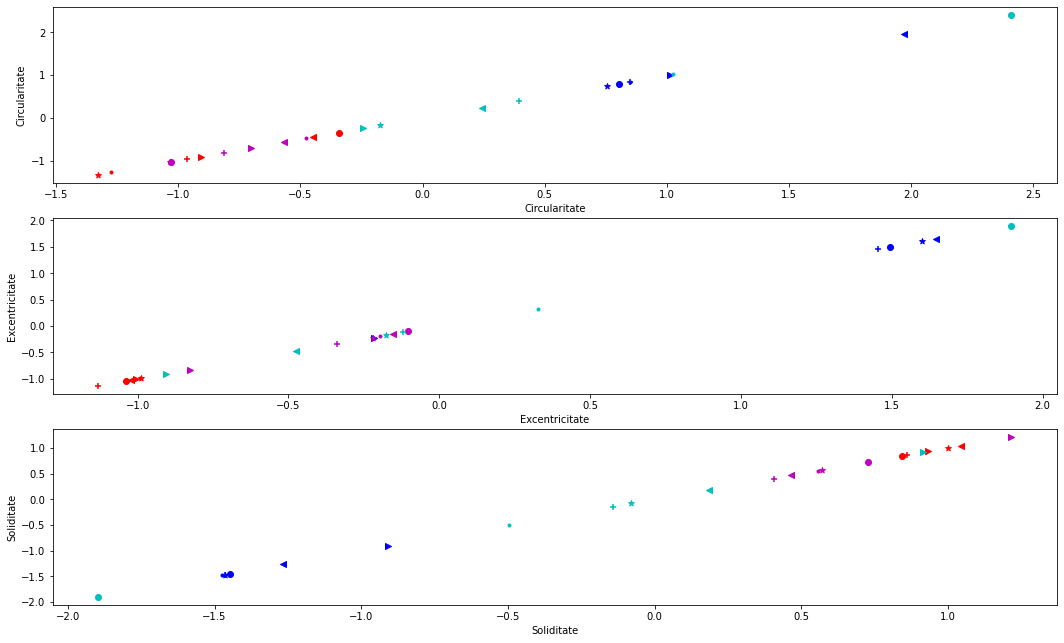

In [16]:
# In[5]: Afisare vector trasaturi 1D
print('\n--- Reprezentarea grafică a obiectelor în diverse spaţii a trăsăturilor ---')
print('\n Reprezentare sptiu 1D.')
print('      Daca ar fi necesar sa reprezentam forma doar printr-o trasatura, care ati alege-o?')
fig = plt.figure(figsize=(3*6,11))
ax1 = fig.add_subplot(311); ax1.set_xlabel('Circularitate'); ax1.set_ylabel('Circularitate');
ax2 = fig.add_subplot(312); ax2.set_xlabel('Excentricitate'); ax2.set_ylabel('Excentricitate');
ax3 = fig.add_subplot(313); ax3.set_xlabel('Soliditate'); ax3.set_ylabel('Soliditate');
for i in range(0,x.shape[0]):
    ax1.scatter(x[i,0],x[i,0], c=clrV[i], marker=frmV[i])
    ax2.scatter(x[i,1],x[i,1], c=clrV[i], marker=frmV[i])
    ax3.scatter(x[i,2],x[i,2], c=clrV[i], marker=frmV[i]) 
plt.show()


 Reprezentare sptiu 2D. 
      Daca ar fi necesar sa reprezentam forma prin doua trasaturi, care le-ati alege?


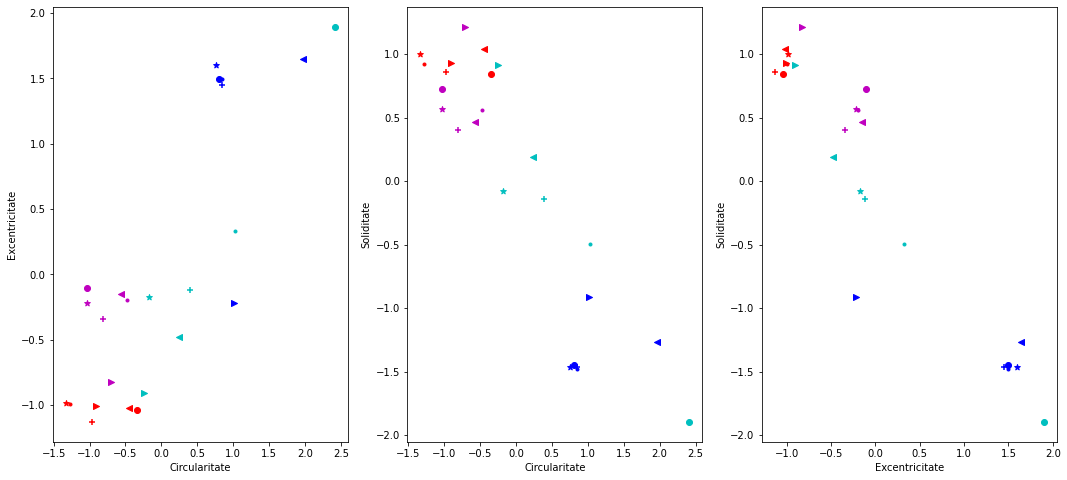

In [17]:
# In[6]: Afisare vector trasaturi 2D
print('\n Reprezentare sptiu 2D. ')
print('      Daca ar fi necesar sa reprezentam forma prin doua trasaturi, care le-ati alege?')
fig = plt.figure(figsize=(3*6,8))
ax1 = fig.add_subplot(131); ax1.set_xlabel('Circularitate'); ax1.set_ylabel('Excentricitate');
ax2 = fig.add_subplot(132); ax2.set_xlabel('Circularitate'); ax2.set_ylabel('Soliditate');
ax3 = fig.add_subplot(133); ax3.set_xlabel('Excentricitate'); ax3.set_ylabel('Soliditate');
for i in range(0,x.shape[0]):
    ax1.scatter(x[i,0],x[i,1], c=clrV[i], marker=frmV[i])
    ax2.scatter(x[i,0],x[i,2], c=clrV[i], marker=frmV[i])
    ax3.scatter(x[i,1],x[i,2], c=clrV[i], marker=frmV[i])
plt.show()


 Reprezentare sptiu 3D. 


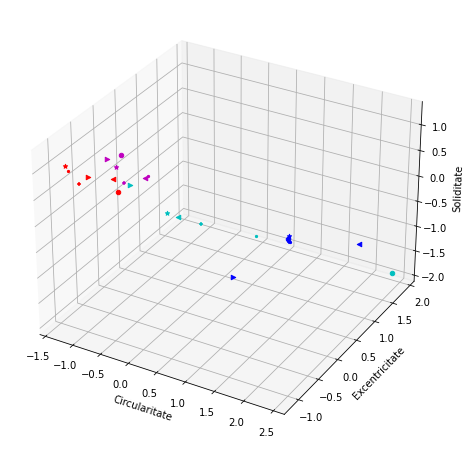

In [18]:
# In[7]: Afisarea grafica a trasaturilor extrase 
# vectorul de trasaturi 3D = [circ, exc, sol]
# Afisare vector trasaturi 3D
print('\n Reprezentare sptiu 3D. ')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
for i in range(0,x.shape[0]):
    ax.scatter(x[i,0],x[i,1],x[i,2], c=clrV[i], marker=frmV[i])
ax.set_xlabel('Circularitate'); ax.set_ylabel('Excentricitate'); ax.set_zlabel('Soliditate')
plt.show()

In [19]:
# In[8]: #Aplicare kNN
# data = x; target = y; target_names = shapeName
trName = np.array(['Circularitate', 'Excentricitate', 'Soliditate'])

print("\n            APLICARE kNN") 
#Setare parametrii
# Pas extragere valori antrenare (=6 - cate o imagine din fiecare clasa)
# Se vor considera valorile 6, 3, 2
stepTrn = 2

# Selectie trasaturi [circ, exc, sol], 0 - circ, 1 - exc, 2 - sol
# pt (circ, exc, sol), trExt = [0, 1, 2]
# pt (circ, sol), trExt = [0, 2], etc

trNr =  np.array([1,2])

# Setare k (n_neighbors kNN), 
# se vor considera valorile: 1, 3, 5 (in functie de nr. imagini prototip/ clasa )
kVal = 5
# ----------------------------------------------
# Date antrenare - extragere tot a stepTrn imagine
vlsTrn= range(0,x.shape[0],stepTrn)
#vlsTrn= [0,4,5,6,9,10,12,16,17,18,21,22]

# Afisare selectii realizate
print('Set date, 4 clase (formele de pe cartile de joc),\n ', shapeName)
print('Set date antrenare: ', len(vlsTrn),' imagini prototip')
print('Set date test: ', x.shape[0]- len(vlsTrn),' imagini')
print('Trasaturi utilizate:', trName[trNr])
print('Clasificator kNN, k ales: ', kVal)


# Setare set date antrenare si set date test

# Date antreanre - extragere tot a stepTrn imagine

X_train = x[vlsTrn,:] # extragere valori set antrenare
y_train = y[vlsTrn]   # extragere etichete

# Selectie date test (cele ramase)
X_test = np.delete(x, vlsTrn, axis=0)
y_test = np.delete(y, vlsTrn, axis=0)


# Selectie trasaturi [circ, exc, sol], 0 - circ, 1 - exc, 2 - sol
# pt (circ, exc, sol), trNr = [0, 1, 2], pt (circ, sol), trNr = [0, 2], etc

X_train = X_train[:,trNr]
X_test  = X_test [:,trNr]

# print("Train set:\n", X_train)
# print("Train Label:\n", y_train)
# print("Test  set:\n", X_test)
# print("Test  Label:\n", y_test)

#kNN selectie k
# definire clasificator kNN
knn = KNeighborsClassifier(n_neighbors=kVal)

#antrenare clasificator folosind setul de date de antrenament
knn.fit(X_train, y_train)

# predictie pe setul de antrenare
y_pred = knn.predict(X_train)

#calculare acuratete
print("\n---Train Set---");
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_train, y_pred))

# predictie pe setul de test
y_pred = knn.predict(X_test)

#calculare acuratete
print("\n---Test Set---");
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print("Original Label:\n", y_test)
print("Predicted Label:\n", y_pred)
prf_score = metrics.precision_recall_fscore_support(y_test, y_pred)
print("precision_recall_fscore_support:")
print(' ',prf_score[0], '\n ', prf_score[1], '\n ', prf_score[2])



            APLICARE kNN
Set date, 4 clase (formele de pe cartile de joc),
  ['Clubs', 'Diamonds', 'Hearts', 'Spades']
Set date antrenare:  12  imagini prototip
Set date test:  12  imagini
Trasaturi utilizate: ['Excentricitate' 'Soliditate']
Clasificator kNN, k ales:  5

---Train Set---
Accuracy: 0.8333333333333334
Confusion Matrix:
 [[3 0 0 0]
 [0 3 0 0]
 [0 0 3 0]
 [0 0 2 1]]

---Test Set---
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[2 0 0 1]
 [0 3 0 0]
 [0 1 2 0]
 [1 1 0 1]]
Original Label:
 [0 0 0 1 1 1 2 2 2 3 3 3]
Predicted Label:
 [0 0 3 1 1 1 2 2 1 3 0 1]
precision_recall_fscore_support:
  [0.66666667 0.6        1.         0.5       ] 
  [0.66666667 1.         0.66666667 0.33333333] 
  [0.66666667 0.75       0.8        0.4       ]



--- Testare imagine specificata dupa nume: ---


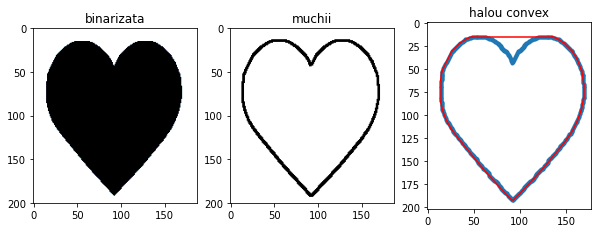

Circularitate = -0.7034147488964414
Excentricitate = -0.8258198336585755
Soliditate = 1.2152202074109821
Imaginea face parte din clasa: 
Diamonds


In [20]:
# (y_true, y_pred, average=None,
# ... labels=['pig', 'dog', 'cat'])
# In[10]: functie pentru predictie
def Classify(x):
    y_pred = knn.predict(x)
    print(shapeName[y_pred[0]])

# In[11]: Testare pe imagini individuale
print('\n--- Testare imagine specificata dupa nume: ---')
x_tst = GeomFeatExtr(pathTrn + 'Hearts5.jpg', 1)
x_tst = scaler.transform([x_tst])
print('Circularitate = ' + str(x_tst[0][0]) + '\nExcentricitate = ' + str(x_tst[0][1]) + '\nSoliditate = ' + str(x_tst[0][2]))
print('Imaginea face parte din clasa: ')
Classify(x_tst[:,trNr])

# incercare 'Other.jpg'
# Garantia ca in MC acuratete 100% pentru k>=3